# Firing Rate 

In [1]:
from getData import *

In [2]:
chin_color='xkcd:dark blue'
ispn_color='xkcd:sky blue'
lts_color='xkcd:violet'
dspn_color='xkcd:pink'
fs_color='xkcd:hot pink'

neuron_IDs = getNeuronMatrix('net_100')

net = 'net_100'


file_path = '/home/ubuntu/BasalGanglia/NEURON-data/' + net + '/spikes.txt'

dspn_spks = []
ispn_spks = []
lts_spks = []
chin_spks = []
fs_spks = []

with open(file_path, 'r') as file:
    lines = file.readlines()

spikes = {}

for line in lines :

    split_line = np.array(line.split("\t"),float)
    nID = int(split_line[1])
    spike_time = split_line[0]
    
    if neuron_IDs[nID][1] == 'dspn':
        dspn_spks.append(spike_time)
        
    elif neuron_IDs[nID][1] == 'ispn':
        ispn_spks.append(spike_time)
        
    elif neuron_IDs[nID][1] == 'fs':
        fs_spks.append(spike_time)
        
    elif neuron_IDs[nID][1] == 'chin':
        chin_spks.append(spike_time)
        
    elif neuron_IDs[nID][1] == 'lts':
        lts_spks.append(spike_time)

dspn_spikes_dt = []
ispn_spikes_dt = []
chin_spikes_dt = []
lts_spikes_dt = []
fs_spikes_dt = []
    
for d_time in range (0, 1991, 10):
    
    start = d_time
    stop = d_time + 10
    spikes_dt_aux = [0,0,0,0,0]

    for elem in dspn_spks:
        if (start < elem <= stop):
            spikes_dt_aux[0] +=1
    for elem in ispn_spks:
        if (start < elem <= stop):
            spikes_dt_aux[1] +=1
    for elem in chin_spks:
        if (start < elem <= stop):
            spikes_dt_aux[2] +=1
    for elem in lts_spks:
        if (start < elem <= stop):
            spikes_dt_aux[3] +=1
    for elem in fs_spks:
        if (start < elem <= stop):
            spikes_dt_aux[4] +=1
            
    dspn_spikes_dt.append(spikes_dt_aux[0])
    ispn_spikes_dt.append(spikes_dt_aux[1])
    chin_spikes_dt.append(spikes_dt_aux[2])
    lts_spikes_dt.append(spikes_dt_aux[3])
    fs_spikes_dt.append(spikes_dt_aux[4])

dspn, ispn, lts, fs, chin = getNeuronSubMatrixes(neuron_IDs)
N_dspn = len(dspn)
N_ispn = len(ispn)
N_chin = len(chin)
N_lts= len(lts)
N_fs = len(fs)

dspn_fr = []
ispn_fr = []
chin_fr = []
lts_fr = []
fs_fr = []

for elem in dspn_spikes_dt:
    dspn_fr.append(elem*100/(N_dspn))
for elem in ispn_spikes_dt:
    ispn_fr.append(elem*100/(N_ispn))
for elem in chin_spikes_dt:
    chin_fr.append(elem*100/(N_chin))
for elem in lts_spikes_dt:
    lts_fr.append(elem*100/(N_lts))
for elem in fs_spikes_dt:
    fs_fr.append(elem*100/(N_fs))

time = []
for d_time in range (0, 1991, 10):
    time.append(d_time)
    
import matplotlib
from ipywidgets import *
import matplotlib.pyplot as plt

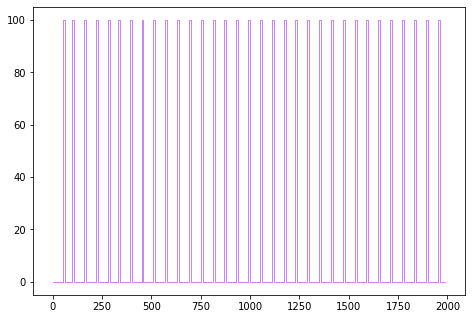

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Firing Rates of the Interneurons")
ax.set_xlabel('Time [ms]')
ax.set_ylabel(' Firing Rate [?]')
plt.step(time, lts_fr, color = lts_color, linewidth=0.5)
plt.step(time, chin_fr, color = chin_color, linewidth=0.5)
plt.step(time, fs_fr, color = fs_color, linewidth=0.5)


plt.show()

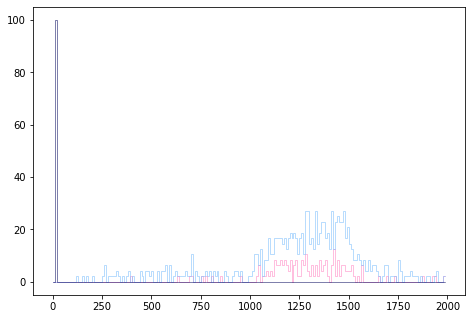

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.step(time, dspn_fr, color = dspn_color, linewidth=0.5)
plt.step(time, ispn_fr, color = ispn_color, linewidth=0.5)
ax.set_title("Firing Rates of dSPN and iSPN")
ax.set_xlabel('Time [ms]')
ax.set_ylabel(' Firing Rate [?]')

plt.show()